# Importing libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


# Importing data

In [2]:
df_scaled = pd.read_csv('cleaned_scaled_df.csv')
df_scaled.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
5,0.0,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.066667,0.0,1.0,0.750000,1.0,1.000000
6,0.0,1.0,0.0,1.0,0.209302,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.0,0.466667,0.0,0.0,0.666667,1.0,0.857143
7,0.0,1.0,1.0,1.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.0,0.000000,1.0,0.0,0.833333,0.6,0.428571
8,1.0,1.0,1.0,1.0,0.209302,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.8,0.000000
9,0.0,0.0,0.0,1.0,0.139535,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,1.0,0.583333,0.6,0.285714


# Clusterization

### Difining amount of clusters needed (for K-means)
By elbows methon we define that optimal amount of clusters is **3**

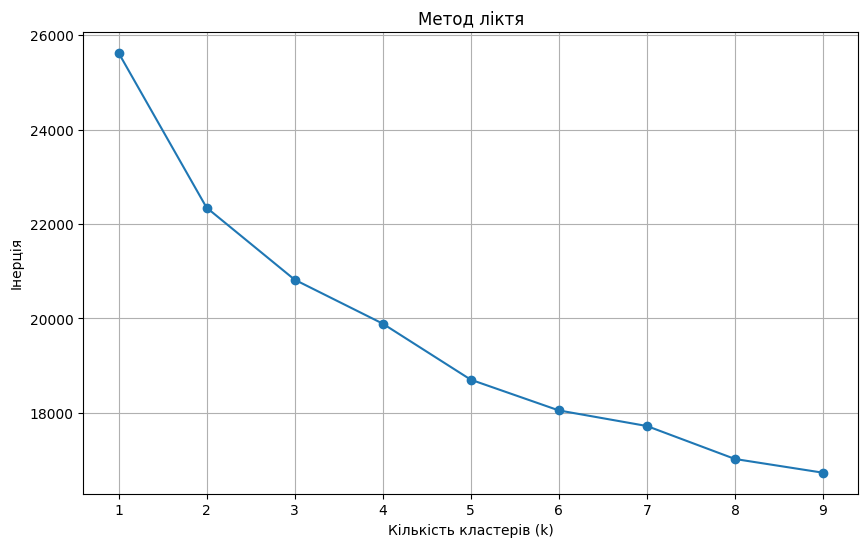

In [3]:
df_scaled = df_scaled.sample(10000)
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_) # Euclidian distances

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів (k)')
plt.ylabel('Інерція') # Sum of the distances to the cluster center from cluster center
plt.xticks(k_values)
plt.grid()
plt.show()

### Clusterization

In [4]:
k = 3 

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled.iloc[:,1:])

df_scaled['Cluster'] = kmeans.labels_

df_scaled.to_csv("clusters.csv", index=False)

### Elbows (centers) of clusters

In [5]:
cluster_summary = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns[1:-1])

cluster_counts = df_scaled['Cluster'].value_counts().sort_index()
cluster_summary['Count'] = cluster_counts.values # add count of values in cluster to the data summary

# df_scaled.head()
cluster_summary

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Count
0,0.054395,0.167319,0.945822,0.171471,0.292211,0.008050,0.011097,0.875979,0.725413,0.888816,...,0.061140,0.251849,0.069241,0.055142,0.025022,0.346388,0.485513,0.857441,0.803338,4595
1,0.708184,0.648959,0.982053,0.204302,0.600144,0.057430,0.167624,0.704594,0.530869,0.741565,...,0.077172,0.441134,0.093539,0.160254,0.203518,1.000000,0.648839,0.799785,0.726490,2787
2,0.794500,0.668831,0.981283,0.209276,0.525592,0.076776,0.139419,0.577158,0.601604,0.764706,...,0.124141,0.531035,0.177629,0.269506,0.397250,0.003438,0.701267,0.744691,0.550366,2618


### Cluster visualization using PCA to reduce dimentionality

H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


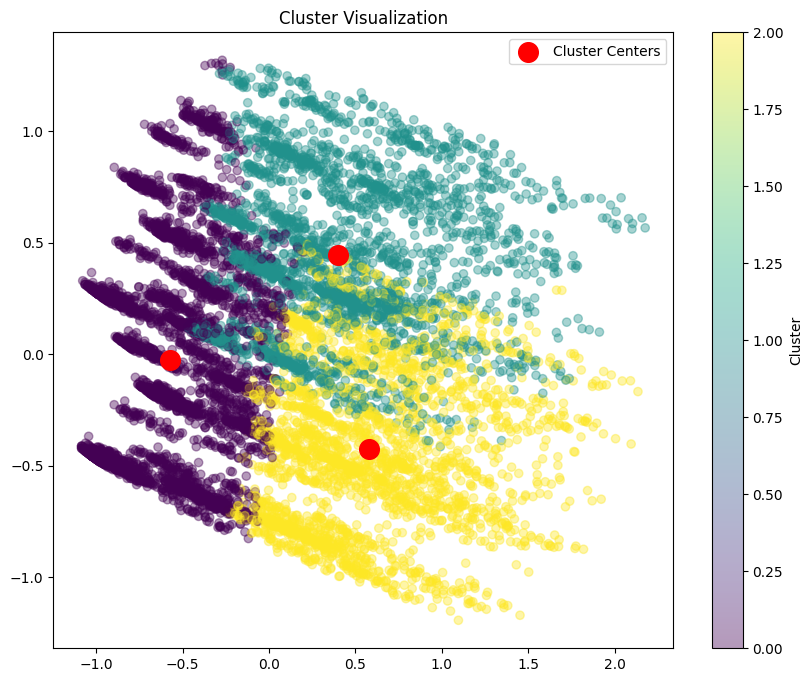

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.iloc[:, 1:-1])
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_scaled['Cluster'], cmap='viridis', alpha=0.4)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', marker='o', s=200, label='Cluster Centers') # centers

plt.colorbar(scatter, label='Cluster')
plt.title('Cluster Visualization')
plt.legend()
plt.show()

# Clusterization using Hierarihical method

### Dendogram visualization

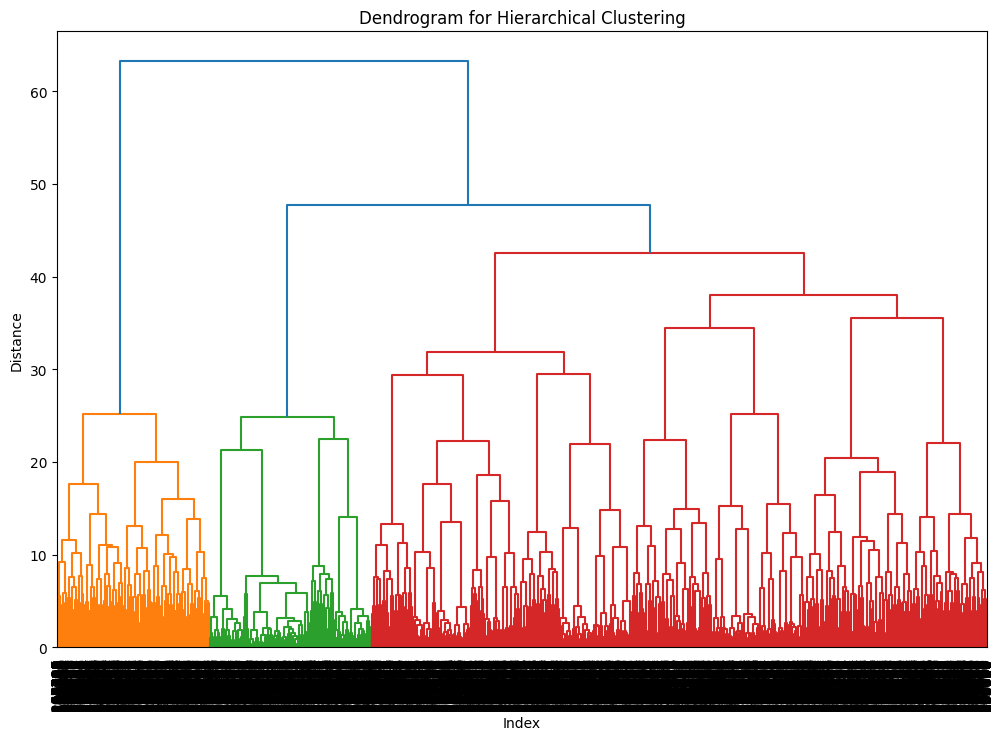

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

df_scaled = pd.read_csv('cleaned_scaled_df.csv')
df_scaled = df_scaled.sample(10000)

linkage_matrix = linkage(df_scaled.iloc[:, 1:], method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, 
           labels=df_scaled.index,
           leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()


### Оптимальна кількість класторів це 5, оскількт різниці в попередніх порядках не такі значні

### Clustering

In [8]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

df_scaled = pd.read_csv('cleaned_scaled_df.csv')
df_scaled = df_scaled.sample(10000)

linkage_matrix = linkage(df_scaled.iloc[:, 1:], method='ward')

# to caluculate referencing to the top clusters
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')  

df_scaled['Cluster'] = clusters

# to count the number of entries in each cluster
cluster_counts = df_scaled['Cluster'].value_counts().sort_index()
cluster_counts = cluster_counts.reset_index()
cluster_counts.columns = ['Cluster', 'Number']

cluster_counts

,Cluster,Number
0,1,1493
1,2,2336
2,3,1921
3,4,1803
4,5,2447


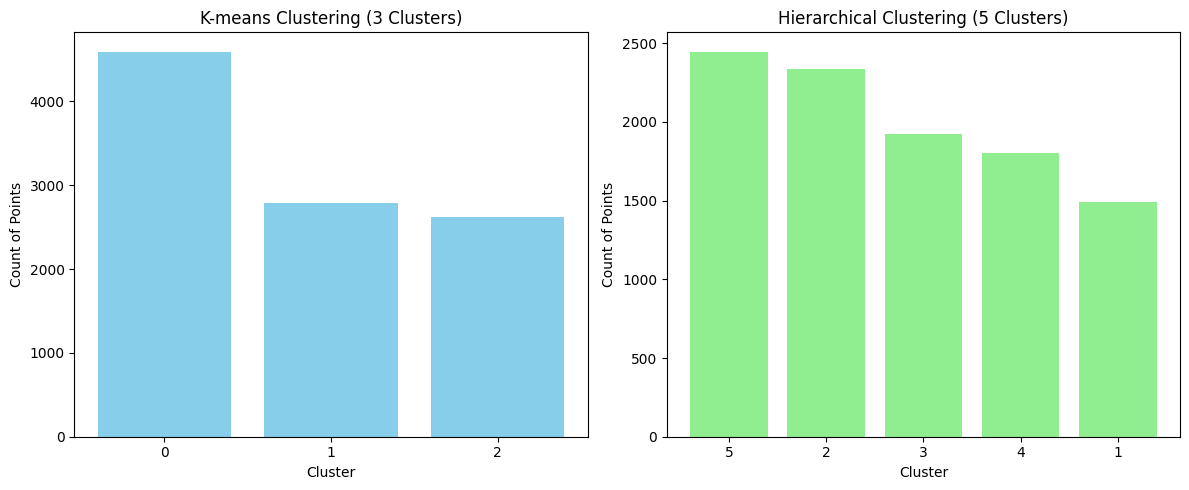

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster

# Assuming df_scaled is your prepared DataFrame with scaled features

# K-means clustering
df_scaled['KMeans_Cluster'] = kmeans.labels_

# Hierarchical clustering
df_scaled['Hierarchical_Cluster'] = clusters

# Clusters entries count
# kmeans_counts = df_scaled['KMeans_Cluster'].value_counts().sort_index()
# hierarchical_counts = df_scaled['Hierarchical_Cluster'].value_counts().sort_index()
kmeans_counts = df_scaled['KMeans_Cluster'].value_counts().sort_values(ascending=False)
hierarchical_counts = df_scaled['Hierarchical_Cluster'].value_counts().sort_values(ascending=False)



plt.figure(figsize=(12, 5))

# K-means counts
plt.subplot(1, 2, 1)
plt.bar(kmeans_counts.index.astype(str), kmeans_counts.values, color='skyblue')
plt.title('K-means Clustering (3 Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count of Points')

# Hierarchical counts
plt.subplot(1, 2, 2)
plt.bar(hierarchical_counts.index.astype(str), hierarchical_counts.values, color='lightgreen')
plt.title('Hierarchical Clustering (5 Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count of Points')

plt.tight_layout()
plt.show()


### Порівняння кілості та збалансованісті кластерів в цих двох кластерних анаізів

In [10]:
kmeans_mean = kmeans_counts.mean()
hierarchical_mean = hierarchical_counts.mean()

kmeans_std = kmeans_counts.std()
hierarchical_std = hierarchical_counts.std()

print(f"K-means розмір в середньому: {kmeans_mean:.2f}, Std: {kmeans_std:.2f}")
print(f"Hierarchical розмір в середньому: {hierarchical_mean:.2f}, Std: {hierarchical_std:.2f}")

K-means розмір в середньому: 3333.33, Std: 1095.90
Hierarchical розмір в середньому: 2000.00, Std: 392.05


Ієрархічний метод показує більше стандартне відхилення, що значить що кластери є більш варіатиіними за розмрами.